# Evaluating Buildings' Energy Efficiency - Project
### Data source: http://archive.ics.uci.edu/ml/datasets/Energy+efficiency# 

__Data Set Information:__

This dataset contains results of a simulation designed to evaluate the energy performance of buildings. The dataset comprises 768 samples and 8 features, aiming to predict two response variables - the heating load and the cooling load, which are required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor conditions in residential buildings. 

Attribute Information:
X1	Relative Compactness 
X2	Surface Area 
X3	Wall Area 
X4	Roof Area 
X5	Overall Height 
X6	Orientation 
X7	Glazing Area 
X8	Glazing Area Distribution 
y1	Heating Load 
y2	Cooling Load

__For this assignment, I would like to answer the following questions:__
1. What variables can be used to predict the heating load?
2. What variables can be used to predict the cooling load?
3. Fit and test a linear model for predicting the heating load.
4. Fit and test a linear model for predicting the cooling load.


In [1]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# Suppress depreciation warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load data
buildings = pd.read_excel('ENB2012_data.xlsx')

In [4]:
# Check load results
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


The data set contains 768 observations of 8 independent variables and 2 target variables. All fields are numeric, and there are no missing values.

In [5]:
#check data
buildings.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
buildings.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [7]:
# Rename the dataframe columns to give them more descriptive names
buildings.rename(columns={'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', \
                        'X4': 'Roof_Area', 'X5': 'Height',  \
                        'X6': 'Orientation', 'X7': 'Glazing_Area', \
                       'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', \
                       'Y2': 'Cooling_Load'}, inplace=True)

In [8]:
#check results
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative_Compactness         768 non-null float64
Surface_Area                 768 non-null float64
Wall_Area                    768 non-null float64
Roof_Area                    768 non-null float64
Height                       768 non-null float64
Orientation                  768 non-null int64
Glazing_Area                 768 non-null float64
Glazing_Area_Distribution    768 non-null int64
Heating_Load                 768 non-null float64
Cooling_Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


## EDA

In [66]:
# Summary statistics for all the variables
buildings.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Height,Glazing_Area,Heating_Load,Cooling_Load,Glazing_Zero
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,0.234375,22.307195,24.587760,0.062500
std,0.105777,88.086116,43.626481,45.165950,1.75114,0.133221,10.090204,9.513306,0.242219
min,0.620000,514.500000,245.000000,110.250000,3.50000,0.000000,6.010000,10.900000,0.000000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,0.100000,12.992500,15.620000,0.000000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,0.250000,18.950000,22.080000,0.000000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,0.400000,31.667500,33.132500,0.000000
max,0.980000,808.500000,416.500000,220.500000,7.00000,0.400000,43.100000,48.030000,1.000000


This dataset looks clean, no missing or other values requiring imputation, values requiring data type conversion, and all variables are numeric.  However, two of the variables use integers to encode categorical data - 'Orientation' and 'Glazing_Area_Distribution' -  that might require creating dummy variables. 

In [10]:
# for practicing purposes, let's double check missing values
missing=buildings.isnull().sum()
missing

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Height                       0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

As expected, there are no missing values in any of the columns. Now, let's visualize the data.

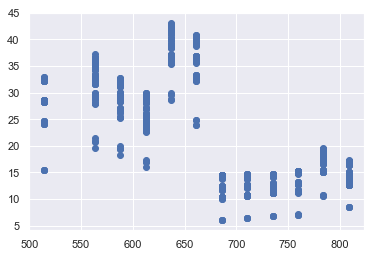

In [11]:
# Let's plot the relationship between the surface area and the heating load.
plt.scatter(buildings['Surface_Area'], buildings['Heating_Load'])

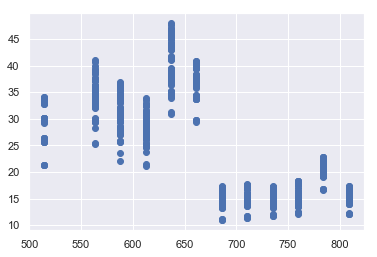

In [12]:
# Let's plot the relationship between the surface area and the cooling load.
plt.scatter(buildings['Surface_Area'], buildings['Cooling_Load'])

Note: The surface area is a continuous variable by nature, but since this dataset was created using simulation, in our case, it has only 12 possible values. For the purposes of the linear regression analysis,  we are going to treat it a continuous variable.

Similarly, 'Wall_Area', 'Roof_Area', 'Height','Glazing_Area", are continuous by nature, but have a limited number of possible values in this dataset.

In [13]:
# Unique values in the colomns 
columns=['Wall_Area','Roof_Area','Height','Glazing_Area']
for x in columns:
    print('Unique values in the column "', x, '" are :', buildings[x].unique())


Unique values in the column " Wall_Area " are : [294.  318.5 343.  416.5 245.  269.5 367.5]
Unique values in the column " Roof_Area " are : [110.25 122.5  147.   220.5 ]
Unique values in the column " Height " are : [7.  3.5]
Unique values in the column " Glazing_Area " are : [0.   0.1  0.25 0.4 ]


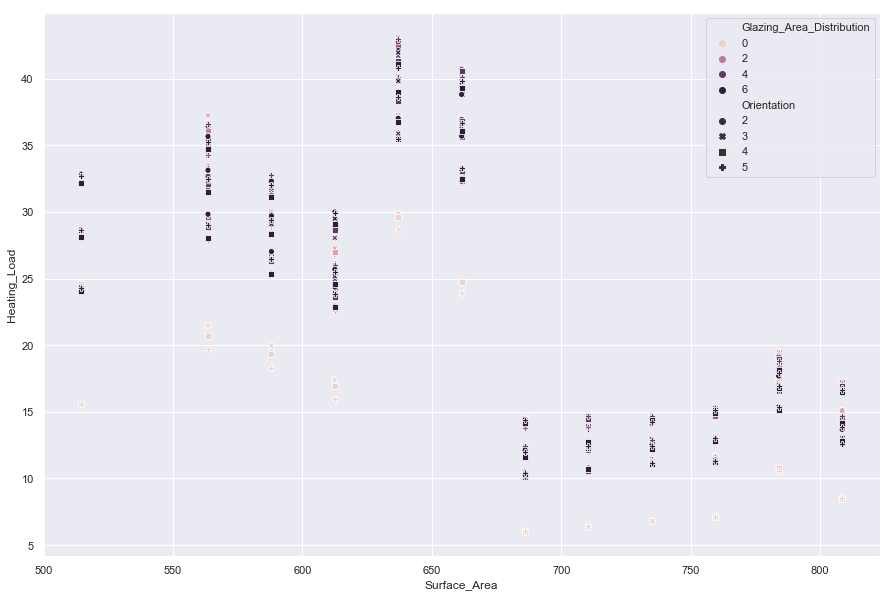

In [14]:
# Let's add additional variables to the visualizations by using style and hue parameters
# 'Heating_load'
plt.figure(figsize=(15,10)) #increase the size of the plot
sns.scatterplot(x='Surface_Area', y='Heating_Load', data=buildings, style='Orientation', hue='Glazing_Area_Distribution')

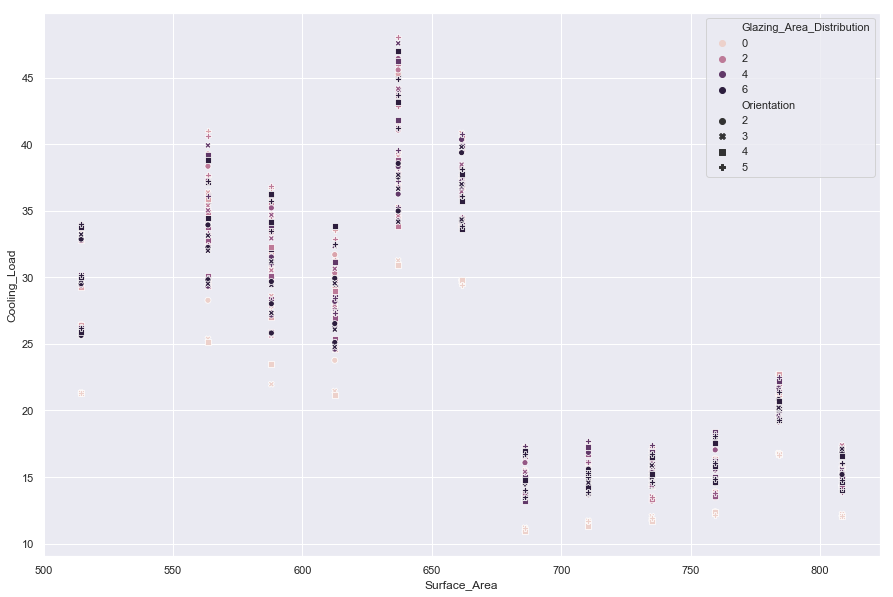

In [15]:
# 'Cooling_load'
plt.figure(figsize=(15,10)) #increase the size of the plot
sns.scatterplot(x='Surface_Area', y='Cooling_Load', data=buildings, style='Orientation', hue='Glazing_Area_Distribution')

### Target variables

In [16]:
# Let's get a closer look at the target variables
# 'Heating_Load"
buildings['Heating_Load'].describe()

count    768.000000
mean      22.307195
std       10.090204
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Heating_Load, dtype: float64

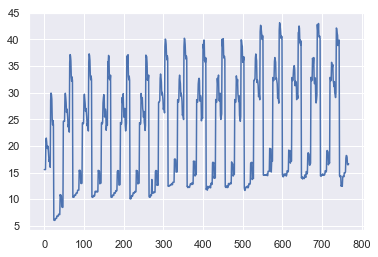

In [17]:
buildings['Heating_Load'].plot()

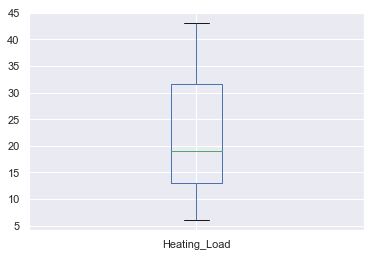

In [18]:
buildings['Heating_Load'].plot.box()

The boxplot is not symmetrical, the distribution is likely to be skewed. 

Skewness: 0.3604456768846134
Kurtosis: -1.245568657654432


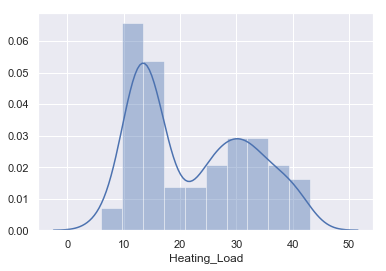

In [19]:
# Distribution
print(f'Skewness: {buildings["Heating_Load"].skew()}')
print(f'Kurtosis: {buildings["Heating_Load"].kurt()}')

sns.distplot(buildings['Heating_Load'])

The 'Heating_Load' outcome variable is not normally distributed. It has a bimodal distribution, which might be connected with the conditions of the experiment during which this data set was collected. Strictly speaking, linear regression requires a normal distribution of the residuals, and not necessarily the normal distribution of the target variable itself.  However, in the case of non-normally distributed target variables the precision of linear models might be affected, or the residuals will not pass the diagnostical tests. So, I am going to cautiously proceed with fitting a linear regression model for this target variable. 

In [20]:
# Let's look at the second target variable - "Cooling_Load"
buildings['Cooling_Load'].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Cooling_Load, dtype: float64

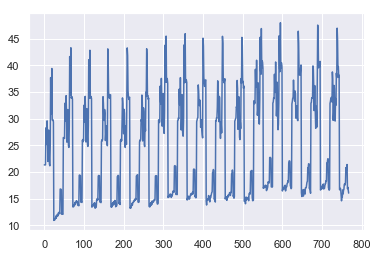

In [21]:
buildings['Cooling_Load'].plot()

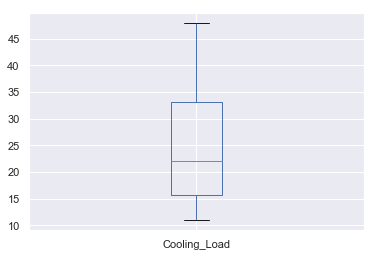

In [22]:
buildings['Cooling_Load'].plot.box()

Again, the boxplot is not symmetrical suggesting at least a skewed distribution. 

Skewness: 0.39599246696276713
Kurtosis: -1.147190344735039


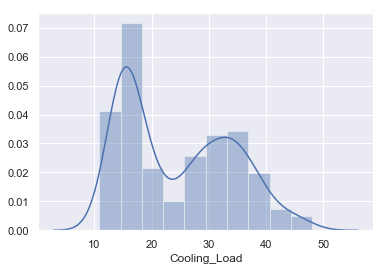

In [24]:
# Let's check the distribution
print(f'Skewness: {buildings["Cooling_Load"].skew()}')
print(f'Kurtosis: {buildings["Cooling_Load"].kurt()}')

sns.distplot(buildings['Cooling_Load'])

In the case of the "Cooling_Load" variable, we, again, have a target variable that is not normally distributed. It has a bimodal distribution, likely connected to the data collection methods. 

### Relationships between the variables

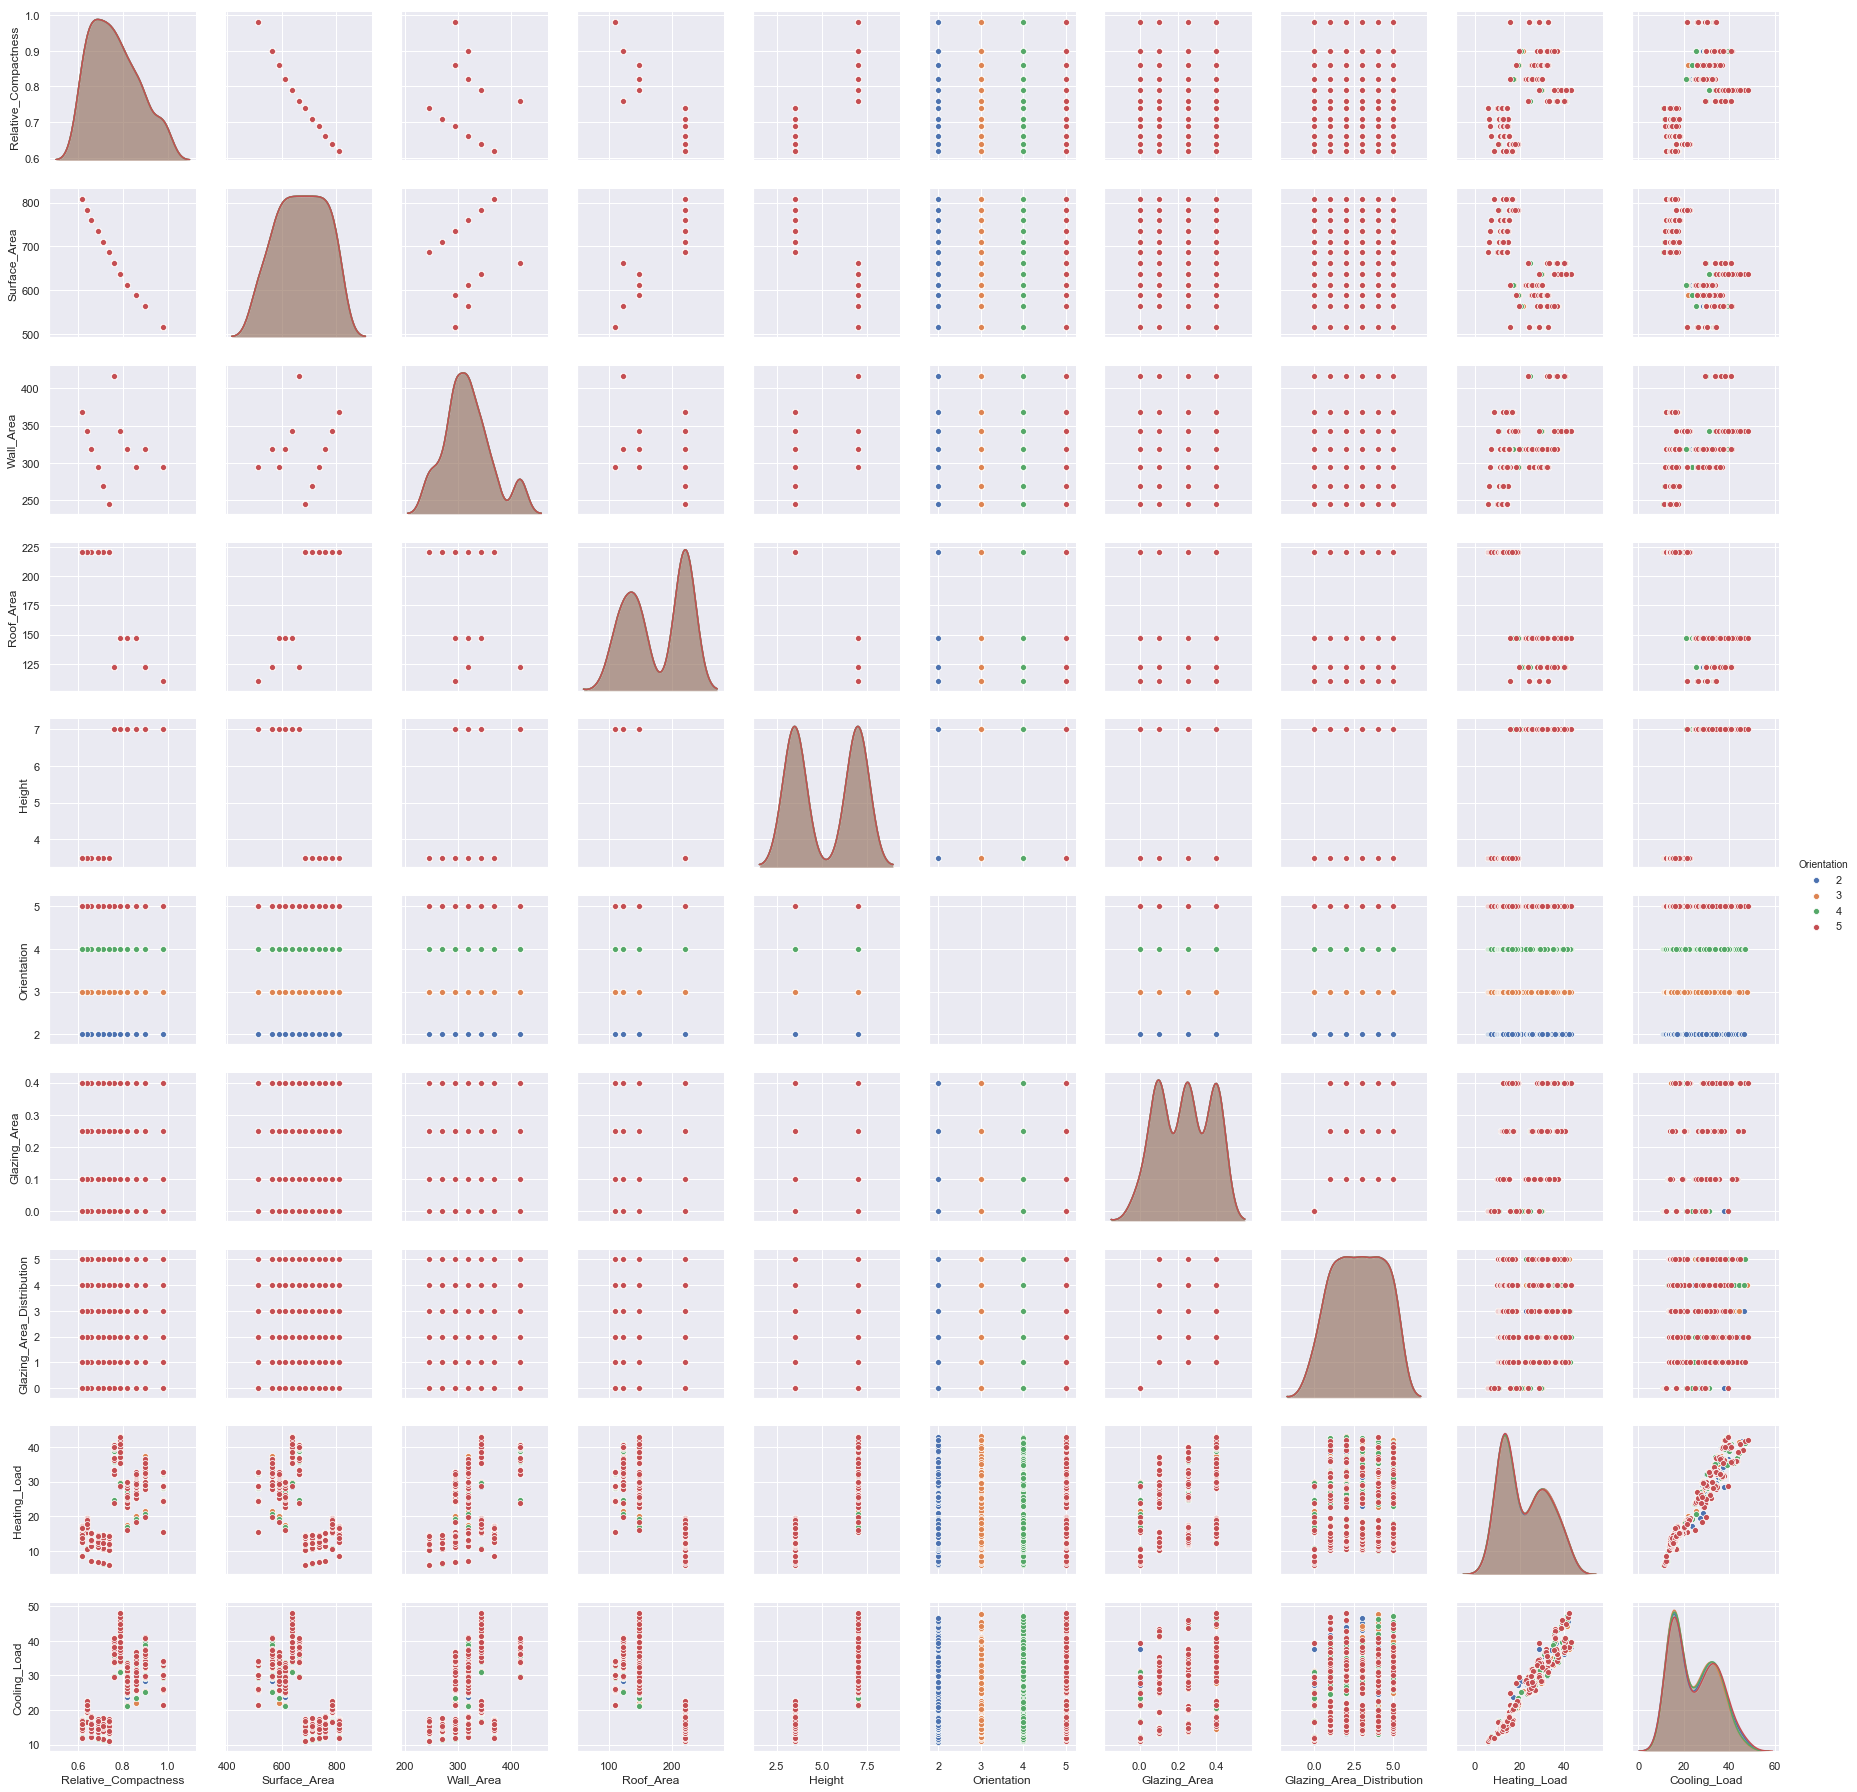

In [25]:
#Let's use pair plots to plot all pairs of variables
sns.pairplot(buildings, hue='Orientation')

These plots suggest that there is a linear relationship between the two target variables themselves, however, it is more difficult to make conclusions about the relationships between the predictor and the targets due to the number of the de-facto discrete values in the dataset.

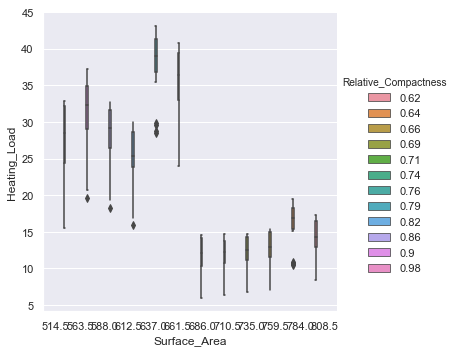

In [26]:
# Let's use factor plots to see the distribution of our target variables in the bins determined by predictors.
# "Heating_Load" and its predictors
sns.factorplot('Surface_Area', 'Heating_Load', 'Relative_Compactness', data=buildings, kind = 'box')

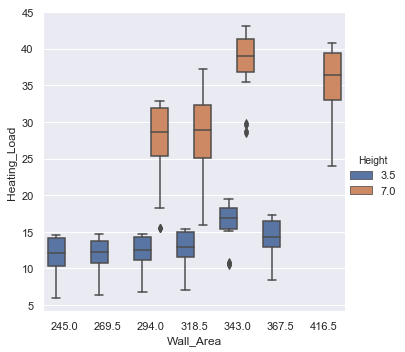

In [27]:
sns.factorplot('Wall_Area', 'Heating_Load', 'Height', data=buildings, kind = 'box')

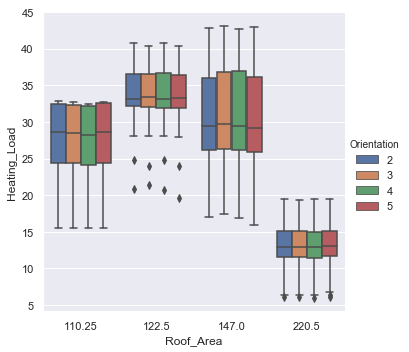

In [28]:
sns.factorplot('Roof_Area', 'Heating_Load', 'Orientation', data=buildings, kind = 'box')

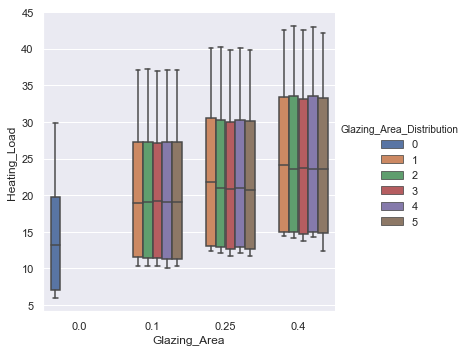

In [29]:
sns.factorplot('Glazing_Area', 'Heating_Load', 'Glazing_Area_Distribution', data=buildings, kind = 'box')

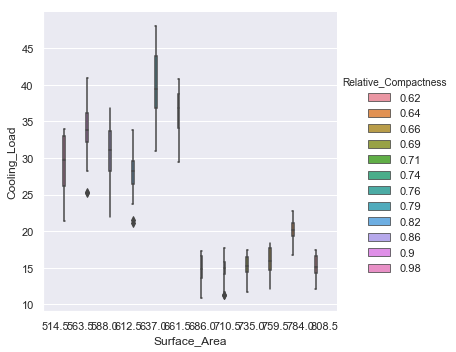

In [30]:
# Let's repeat the same set of the factor plots to the second target variable - 'Cooling_Load'.
sns.factorplot('Surface_Area', 'Cooling_Load', 'Relative_Compactness', data=buildings, kind = 'box')

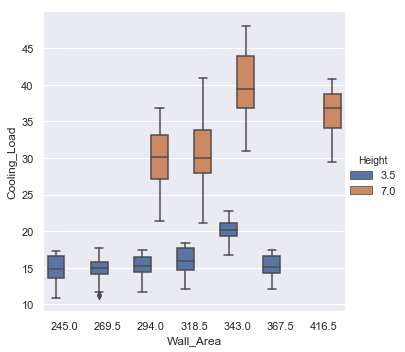

In [31]:
sns.factorplot('Wall_Area', 'Cooling_Load', 'Height', data=buildings, kind = 'box')

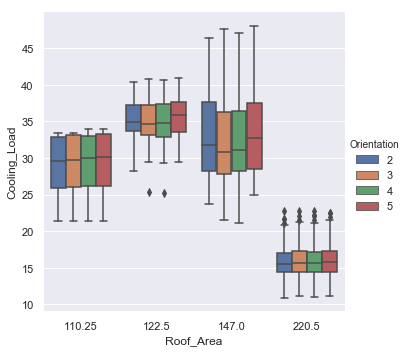

In [32]:
sns.factorplot('Roof_Area', 'Cooling_Load', 'Orientation', data=buildings, kind = 'box')

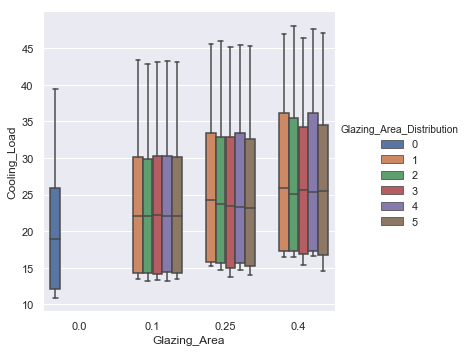

In [33]:
sns.factorplot('Glazing_Area', 'Cooling_Load', 'Glazing_Area_Distribution', data=buildings, kind = 'box')

The factor plots above reflect the fact that due to the conditions of the experiments conducted to collect this dataset, there is just one observation for each unique combination of the predictors. It is interesting to note, that both our target variables ("Heating_Load" and "Cooling_Load")  have very similar relationships with their predictors.

In [34]:
# Let's investigate the influence of two categorical variables on the outcomes using the pivot tables and heatmaps

# "Heating_Load"
heating = buildings.pivot_table(index='Glazing_Area_Distribution', columns='Orientation', values='Heating_Load')
heating

Orientation,2,3,4,5
Glazing_Area_Distribution,,,,
0,14.345833,14.464167,14.368000,13.967500
1,22.943056,23.216667,23.138889,22.805833
2,22.945833,23.147778,22.913611,22.730556
3,22.487500,22.769444,22.742222,22.726667
4,23.026389,22.686944,22.729722,23.103611
5,22.817222,22.721389,22.405556,22.779444


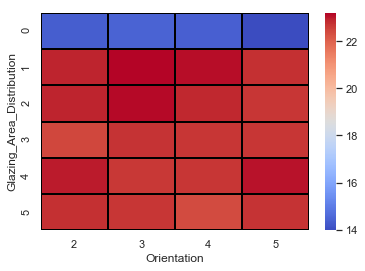

In [35]:
sns.heatmap(heating, cmap='coolwarm', linecolor='black', linewidths=1)

The target variable "Heating_Load" has very similar levels for all combinations of 'Glazing_Area_Distribution' and "Orientation" except when "Glazing_Area_Distribution"==0 

In [36]:
# "Cooling_Load"

cooling = buildings.pivot_table(index='Glazing_Area_Distribution', columns='Orientation', values='Cooling_Load')
cooling

Orientation,2,3,4,5
Glazing_Area_Distribution,,,,
0,20.280000,18.941667,18.920833,20.682500
1,25.718611,24.463889,24.333056,26.202500
2,25.378889,24.172778,24.289722,26.146111
3,25.431111,24.975278,24.152222,24.079167
4,24.005278,25.901389,25.729167,24.424722
5,23.930278,23.839722,25.750556,25.339444


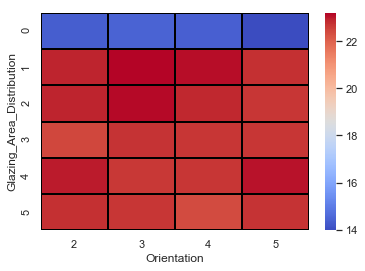

In [37]:
sns.heatmap(heating, cmap='coolwarm', linecolor='black', linewidths=1)

Similar to the situation with "Heating_Load",  "Cooling_Load" demonstrates very close values for all combinations of "Glazing_Area_Distribution" and "Orientation" except for "Glazing_Area_Distribution"==0.  It means that the "Glazing_Area_Distribution" can be an important predictor for both "Heating_Load" and "Cooling" load, but this relationship might not necessarily be linear.  

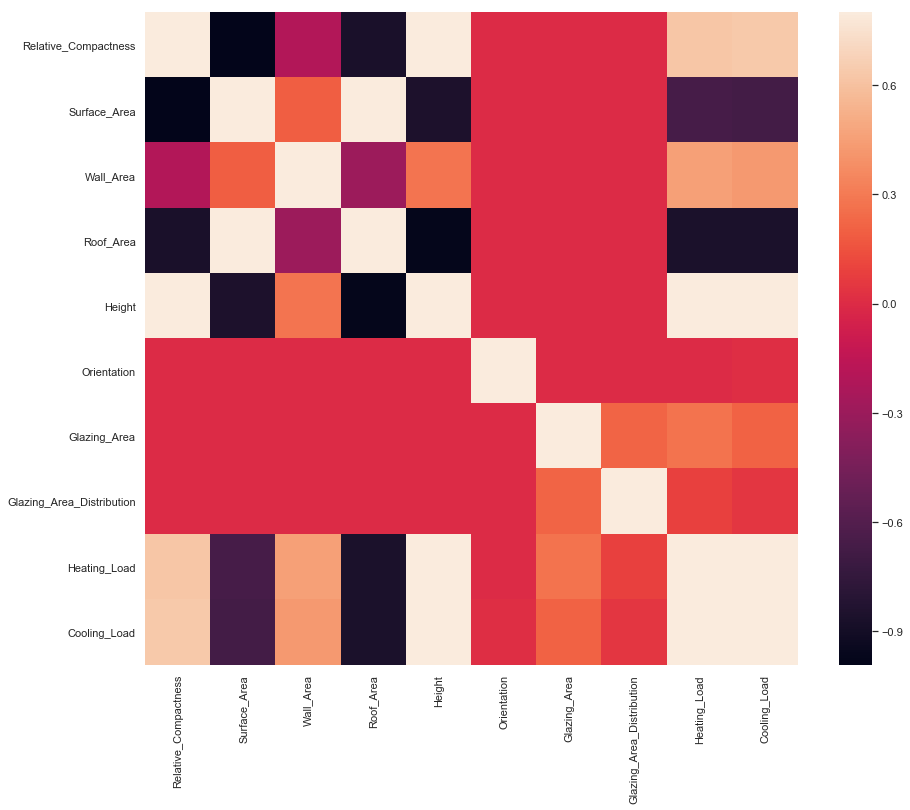

In [38]:
#Correlation matrix and heat map
corrmat= buildings.corr()
f, ax = plt.subplots(figsize=(15,12)) #increase the size of the plot
sns.heatmap(corrmat, vmax=0.8, square=True)

The majority of the independent variables included in this dataset show a strong either positive or negative correlation with the target variables with the three exceptions -  "Glazing_Area", "Glazing_Area_Distibution", and "Orientation". Earlier, we established that only one level of "Glazing_Area_Distribution" variable seems to have an impact on the target variables. So, I decided to drop the "Orientation" variable, and to encode the "Glazing_Level_Distribution"==0 as a new variable "Glazing_Zero" == 1 for "Glazing_Level_Distribution"==0 and "Glazing_Zero"=0 for all other cases. 

In [39]:
#Drop the 'Orientation' column
buildings.drop('Orientation', axis=1, inplace=True)
#check results
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Relative_Compactness         768 non-null float64
Surface_Area                 768 non-null float64
Wall_Area                    768 non-null float64
Roof_Area                    768 non-null float64
Height                       768 non-null float64
Glazing_Area                 768 non-null float64
Glazing_Area_Distribution    768 non-null int64
Heating_Load                 768 non-null float64
Cooling_Load                 768 non-null float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [40]:
# Encode 'Glazing_Area_Distribution'=0 
buildings['Glazing_Zero'] = np.where(buildings['Glazing_Area_Distribution']==0, 1, 0)
# drop the initial 'Glazing_Area_Distribution' column
buildings.drop('Glazing_Area_Distribution', axis=1, inplace=True)
#check results
buildings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Relative_Compactness    768 non-null float64
Surface_Area            768 non-null float64
Wall_Area               768 non-null float64
Roof_Area               768 non-null float64
Height                  768 non-null float64
Glazing_Area            768 non-null float64
Heating_Load            768 non-null float64
Cooling_Load            768 non-null float64
Glazing_Zero            768 non-null int32
dtypes: float64(8), int32(1)
memory usage: 51.1 KB


In [41]:
#Look at the resulting df
buildings.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Height,Glazing_Area,Heating_Load,Cooling_Load,Glazing_Zero
0,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1
1,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1
2,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1
3,0.98,514.5,294.0,110.25,7.0,0.0,15.55,21.33,1
4,0.90,563.5,318.5,122.50,7.0,0.0,20.84,28.28,1


## Linear Regression to predict "Heathing_Load"

Let's build a linear regression model for predicting the "Heating_Load". 

In [42]:
#Split the dataset into training and testing
from sklearn.model_selection import train_test_split

#set up target variable and independent variables
X=buildings.drop(['Heating_Load', 'Cooling_Load'], axis=1) #independent variables
y=buildings['Heating_Load'] #target variable
#Split the dataset into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
#Check results
y_train.shape

(614,)

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 603 to 684
Data columns (total 7 columns):
Relative_Compactness    614 non-null float64
Surface_Area            614 non-null float64
Wall_Area               614 non-null float64
Roof_Area               614 non-null float64
Height                  614 non-null float64
Glazing_Area            614 non-null float64
Glazing_Zero            614 non-null int32
dtypes: float64(6), int32(1)
memory usage: 36.0 KB


In [45]:
y_test.shape

(154,)

In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 661 to 380
Data columns (total 7 columns):
Relative_Compactness    154 non-null float64
Surface_Area            154 non-null float64
Wall_Area               154 non-null float64
Roof_Area               154 non-null float64
Height                  154 non-null float64
Glazing_Area            154 non-null float64
Glazing_Zero            154 non-null int32
dtypes: float64(6), int32(1)
memory usage: 9.0 KB


In [47]:
# Let's fit the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#create a linear regression model
model1=LinearRegression()

In [48]:
#fit the model 
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# Display the model1's regression coefficients for each variable 
model1.coef_

array([-5.98357726e+01, -5.99585776e-02,  3.95673791e-02, -4.97629784e-02,
        3.97239251e+00,  1.67657917e+01, -4.28408246e+00])

In [50]:
#Display the intercept coeffiecient 
model1.intercept_

79.93738751095358

In [51]:
# Use model to generate predictions for the test dataset
predictions1=model1.predict(X_test)

In [52]:
# Mean squared error 
print(f'Mean Squared error: {mean_squared_error(y_test, predictions1)}')

Mean Squared error: 9.248212313769008


In [53]:
# Coefficient of determination
print(f'R2 score: {r2_score(y_test, predictions1)}')


R2 score: 0.9162498905430468


The multiple linear regression model demonstrated a 91.6% determination coefficient on the test data set. It means that it is likely to predict 91.6% of the future fluctuations of the target variable using the chosen set of the predictor variables. However, in order for the model to reliably demonstrated this predictive power, it needs to satisfy the assumption applied to the linear models - homoscedasticity of the residuals and the normal distribution of the residuals.

### Model 1 Diagnositc

Let's check the model1's assumptions.

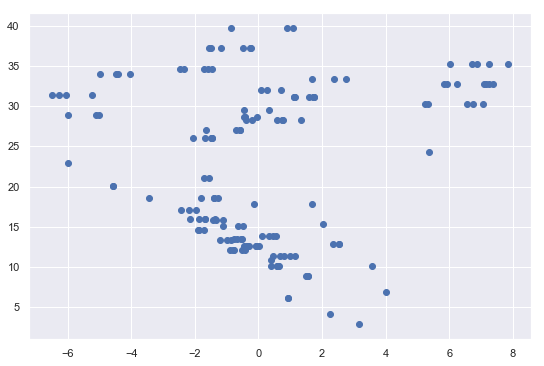

In [54]:
#Equal variance (homoscedasticity) of the residuals
residuals1=y_test - predictions1
fig, ax = plt.subplots(figsize=(9, 6)) 
_ = ax.scatter(residuals1, predictions1)

By plotting predictions vs. residuals, we can check if the residuals demonstrate any trends depending on the level of predictions that would indicate a systematic error. While there is no clear trend, this scatter plot is not completely random. There are potential clusters of the residuals. 

0.9335887297165057

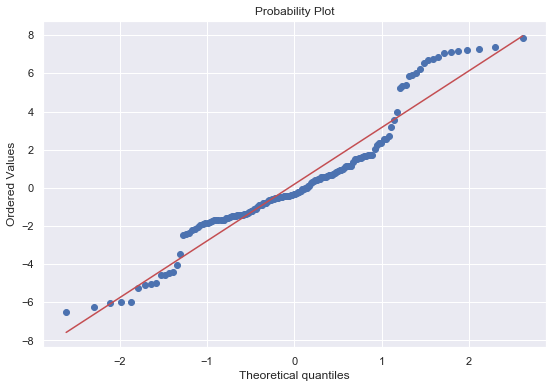

In [55]:
# Normal distribution of the residuals - Check Q-Q plot
import scipy as sp
fig, ax = plt.subplots(figsize=(9, 6))
_, (__, ___, r) = sp.stats.probplot(residuals1, plot=ax, fit=True)
r**2

The above plot is designed to check for the normality of the residual's distribution by comparing observed residuals to them to the theoretical QQ plot. In this case, again, the residuals follow the general line, but there are some deviations from the theoretical QQ plot. So, the distribution of the residuals cannot be called completely normal.   It means, that while the model demonstrated acceptable scores on the given test data, its results might be less robust on a different test set, and the model needs improvement.

## Linear Regression Model for predicting the "Cooling_Load"

Let's repeat the model building steps in order to try to predict the "Cooling_Load".

In [56]:
#Split the dataset into training and testing

#set up target variable and independent variables
X2=buildings.drop(['Heating_Load', 'Cooling_Load'], axis=1) #independent variables
y2=buildings['Cooling_Load'] #target variable

#Split the dataset into training and test part
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)


In [57]:
#Check test set
X2_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 661 to 380
Data columns (total 7 columns):
Relative_Compactness    154 non-null float64
Surface_Area            154 non-null float64
Wall_Area               154 non-null float64
Roof_Area               154 non-null float64
Height                  154 non-null float64
Glazing_Area            154 non-null float64
Glazing_Zero            154 non-null int32
dtypes: float64(6), int32(1)
memory usage: 9.0 KB


In [58]:
#create a linear regression model
model2=LinearRegression()
# fit the model
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [59]:
#Display model2's regression coefficients for each variable 
model2.coef_

array([-6.59147145e+01, -6.10822842e-02,  2.38888299e-02, -4.24855570e-02,
        4.27349820e+00,  1.39232923e+01, -1.55456941e+00])

In [60]:
# Display the intercept coefficient 
model2.intercept_

90.30573080847444

In [61]:
# Use model to generate predictions
predictions2=model2.predict(X2_test)

In [62]:
# Mean squared error 
print(f'Mean Squared error: {mean_squared_error(y2_test, predictions2)}')

Mean Squared error: 10.333041214284753


In [63]:
# Coefficient of determination
print(f'R2 score: {r2_score(y2_test, predictions2)}')

R2 score: 0.8901389963280999


The model2 for predicting the "Cooling_Load" demonstrated slightly worse precision compared to the model build for predicting the "Heating_Load".  In this case, the mean squared error was 10.333041214284753, and the coefficient of determinations (R2 score) dropped to about 89.01%. It means, that this model is likely to predict slightly less than 90%  of the future variations of the target variable ("Cooling_Load") using the chosen predictors. However, in this case, the predictive power can also be affected by the fact whether the model satisfies the assumptions for linear regression or not. 

### Model 2 Diagnostic

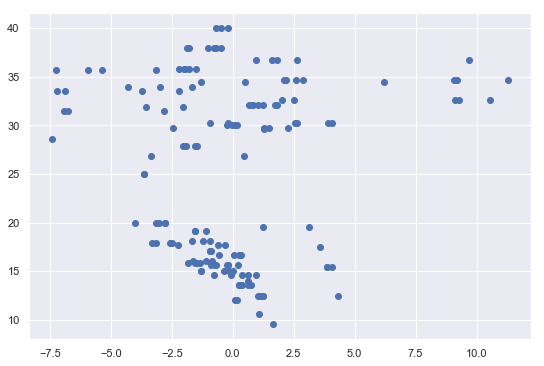

In [64]:
# Equal variance (homoscedasticity) of the residuals
residuals2=y2_test - predictions2
fig, ax = plt.subplots(figsize=(9, 6)) 
_ = ax.scatter(residuals2, predictions2)

In this case, once again we observe a situation when the distribution of the residuals does not show any clear trends, but the residuals are not completely homoscedastic. 

0.9129748417231376

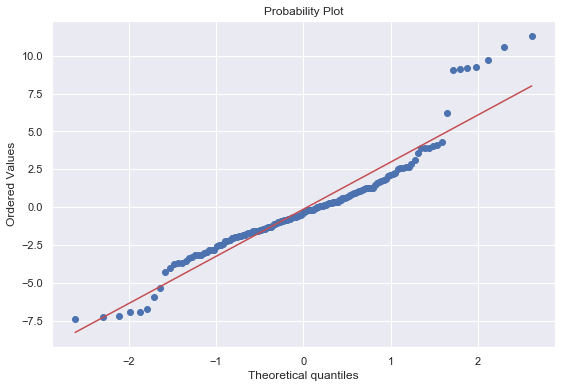

In [65]:
# Normal distribution of the residuals - Check Q-Q plot
fig, ax = plt.subplots(figsize=(9, 6))
_, (__, ___, r) = sp.stats.probplot(residuals2, plot=ax, fit=True)
r**2

The theoretical QQ plot above sho that while the majority of the residuals follow the line, there are some deviations, especially in the top part of the graph. It means the distribution of the residuals is not completely normal, which may affect the performance of the model in the future.  

__Conclusions:__

- all variables included in the initial data set, except for the "Orientation", were used in the linear models built to predict the target variables ( model1 for 'Heating_Load' and model2 for 'Cooling_Load'). The sets of variables-predictors for both target variables (the 'Heating_Load' and the 'Cooling_Load') are the same (same factors influence those decisions), but the regression coefficients associated with the variables in the models are different.  
- the models demonstrated not great, but acceptable coefficients of determination on the test data (91.6%  and 89.01%)
- however, neither of the models completely passed the diagnostic (requirements of homoscedasticity and normality of the distribution of the residuals)
- it means that in order to be reliably applied to other datasets, both models need adjustments.
- the non-conformity of the residuals is likely due to the fact that I decided to try to fit the models despite the non-normality of the target variables.
- both target variables demonstrated bimodal distributions. This issue needs to be addressed before refining the models. One of the possible approaches is to represents the current distributions of the target variables by a sum of two normal distributions and to separately fit two linear regression models for each target.
- since linear regression is not the best choice for bimodal distributions, some other algorithms might be more suitable for forecasting here, however, this task lies outside of the scope of this assignment.
- if keeping the current models and trying to incrementally improve them, one solution would be to drop the independent variables that showed very low regression coefficients and try to fit a more parsimonious model. In some instances, it helps to improve the overall predictive power.
- another way to potentially improve the current models is to use cross-validation.
- Lesson learned - if planning on using linear regression as a main instrument of the analysis, be careful about choosing datasets that were compiled based on the results of the experiments. The limited number of trials and combinations of each variables de-facto turn even supposedly continuous numerical variables into discrete variables that are better suited for other types of analysis.  
I chose this dataset because I was interested in the topic and curious about what factors influence required specifications for HVAC systems, and consequently the energy efficiency of residential buildings, but, in my opinion, it is not the best choice for linear modeling.   